<a href="https://colab.research.google.com/github/Ahnjihye/Data_Analysis/blob/master/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82_%EC%8A%A4%EC%BF%A8%EC%A1%B4_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [48]:
from google.colab import files
uploaded = files.upload() 

import csv
f = open('schoolzone_accident_2016.csv', encoding ='cp949')
data_2016 = csv.reader(f)
next(data_2016)
data_2016 = list(data_2016)

from google.colab import files
uploaded = files.upload()        

import csv
f = open('schoolzone_accident_2017.csv', encoding ='cp949')
data_2017 = csv.reader(f)
next(data_2017)
data_2017 = list(data_2017)

from google.colab import files
uploaded = files.upload()        

import csv
f = open('schoolzone_accident_2018.csv', encoding ='cp949')
data_2018 = csv.reader(f)
next(data_2018)
data_2018 = list(data_2018)

Saving schoolzone_accident_2016.csv to schoolzone_accident_2016.csv


Saving schoolzone_accident_2017.csv to schoolzone_accident_2017.csv


Saving schoolzone_accident_2018.csv to schoolzone_accident_2018.csv


In [49]:
data =  data_2016 + data_2017 + data_2018
len(data)

126

### 1. 어떤 지역이 스쿨존 사고가 가장 많을까?

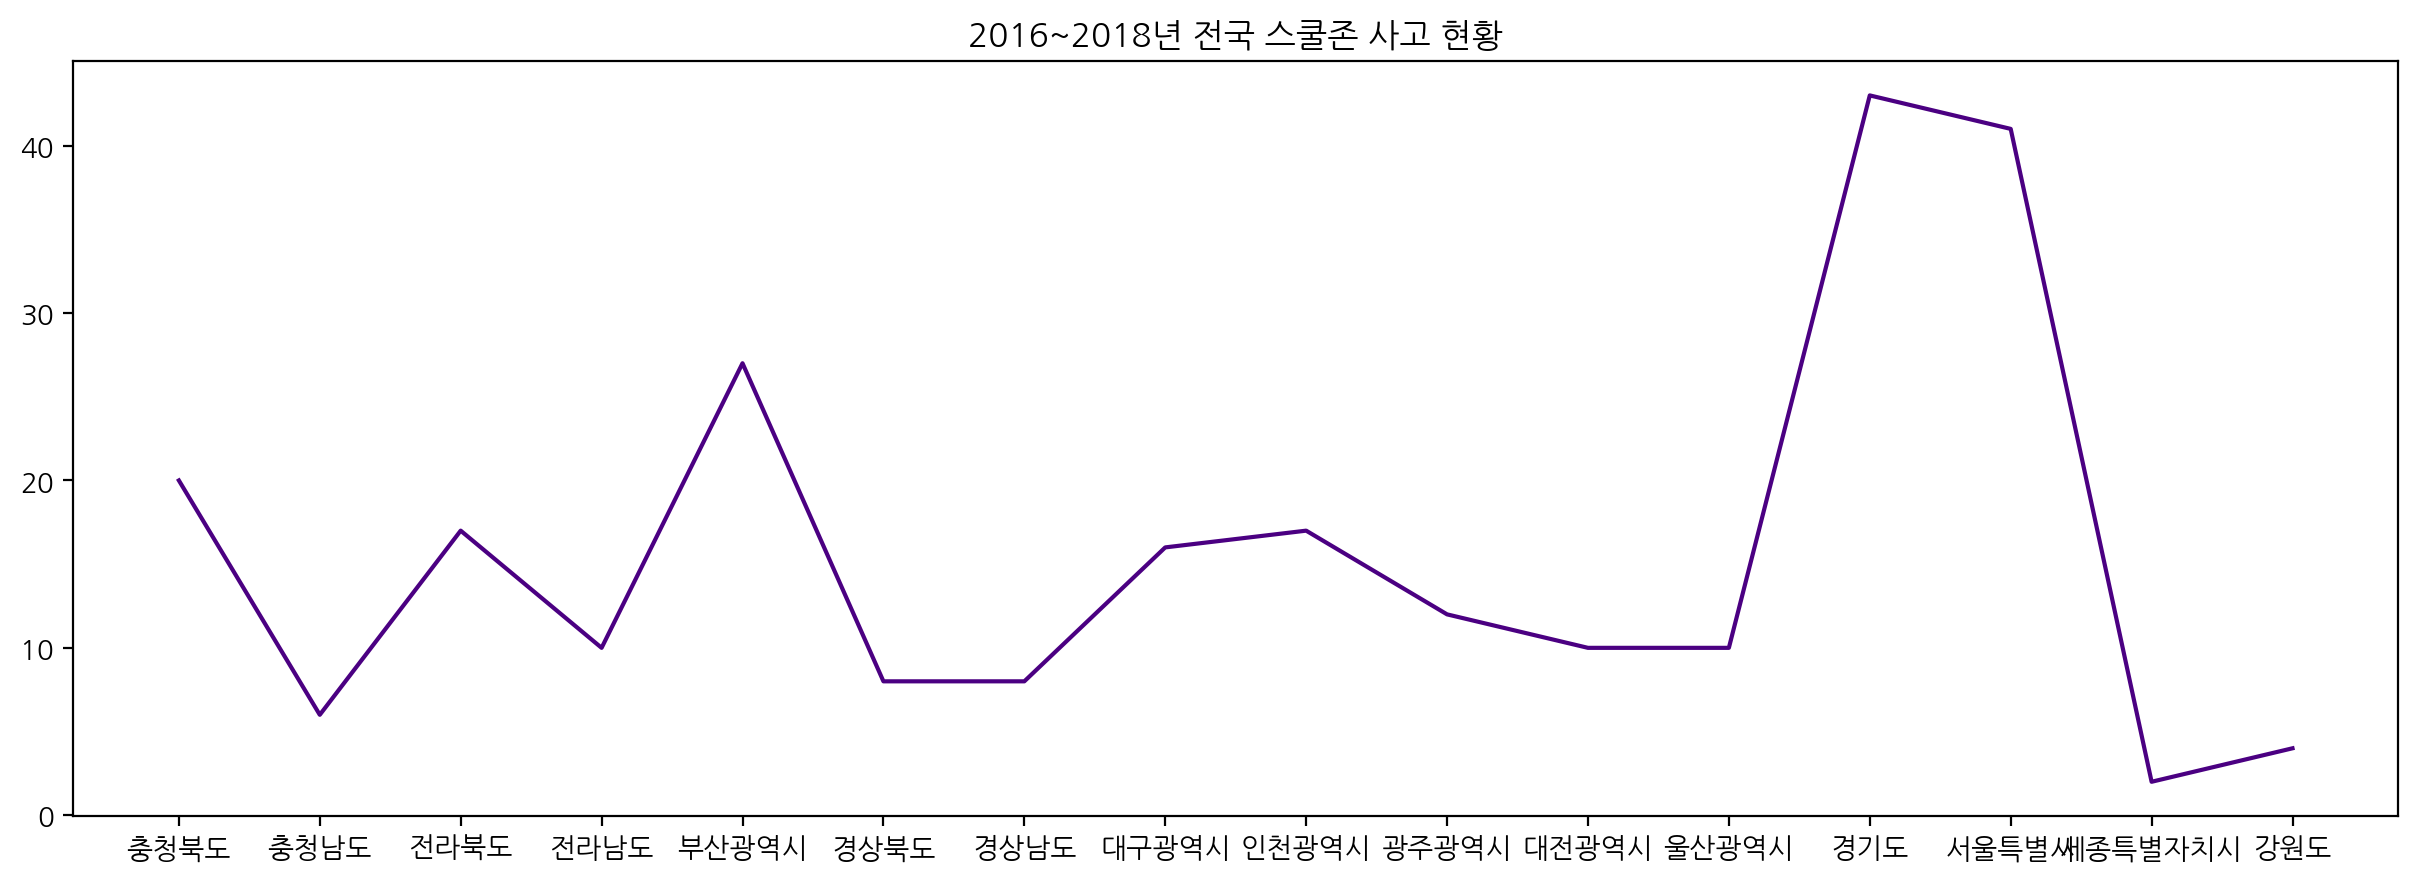

In [52]:
accident = {}     # 시/도별 사고건수를 저장할 딕셔너리

for row in data : 
    region = row[5].split()[0]
    if region not in accident.keys() : 
        accident[region] = int(row[6])
    else : 
        accident[region] += int(row[6])

plt.figure(dpi=100, figsize= (15, 5))
plt.title('2016~2018년 전국 스쿨존 사고 현황')
plt.plot(list(accident.keys()), list(accident.values()), color = 'indigo')
plt.show()

In [53]:
accident

{'강원도': 4,
 '경기도': 43,
 '경상남도': 8,
 '경상북도': 8,
 '광주광역시': 12,
 '대구광역시': 16,
 '대전광역시': 10,
 '부산광역시': 27,
 '서울특별시': 41,
 '세종특별자치시': 2,
 '울산광역시': 10,
 '인천광역시': 17,
 '전라남도': 10,
 '전라북도': 17,
 '충청남도': 6,
 '충청북도': 20}

### 2. 어떤 학교 근처의 사고가 가장 많을까?

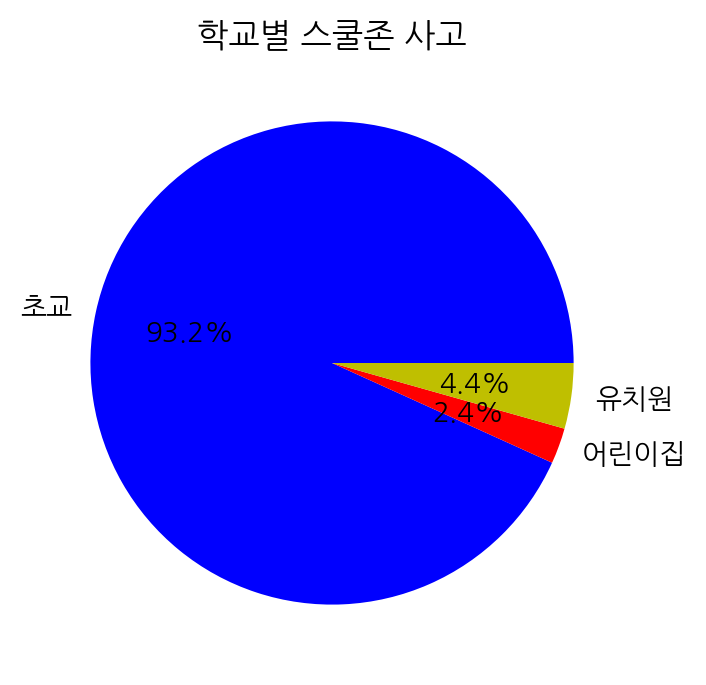

In [56]:
school = [0,0,0]   #[0] = 초교, [1] = 어린이집, [2] = 유치원

for row in data : 
    if '초교' in row[5] : 
        school[0] += int(row[6])
    elif '어린이집' in row[5] : 
        school[1] += int(row[6])
    elif '유치원' in row[5] : 
        school[2] += int(row[6])

plt.figure(dpi=100)
plt.title("학교별 스쿨존 사고")
plt.pie(school,labels = ["초교",'어린이집','유치원'],autopct = '%1.1f%%',
        colors = ['b','r','y'])
plt.show()

### 3. 지역별, 연도별 사고 발생

In [58]:
# 시도가 저장된 리스트 region
region  = list(accident.keys())
acci_2016 = [0 for i in range(len(region))]
acci_2017 = [0 for i in range(len(region))]
acci_2018 = [0 for i in range(len(region))]

for row in data : 
    # 리스트 region에서 현재 지역이 몇 번째 인덱스인지 찾기
    idx = region.index(row[5].split()[0])
    if int(row[1][:4]) == 2016 : 
        acci_2016[idx] += int(row[6])     

    elif int(row[1][:4]) == 2017 : 
        acci_2017[idx] += int(row[6])

    else :
        acci_2018[idx] += int(row[6])

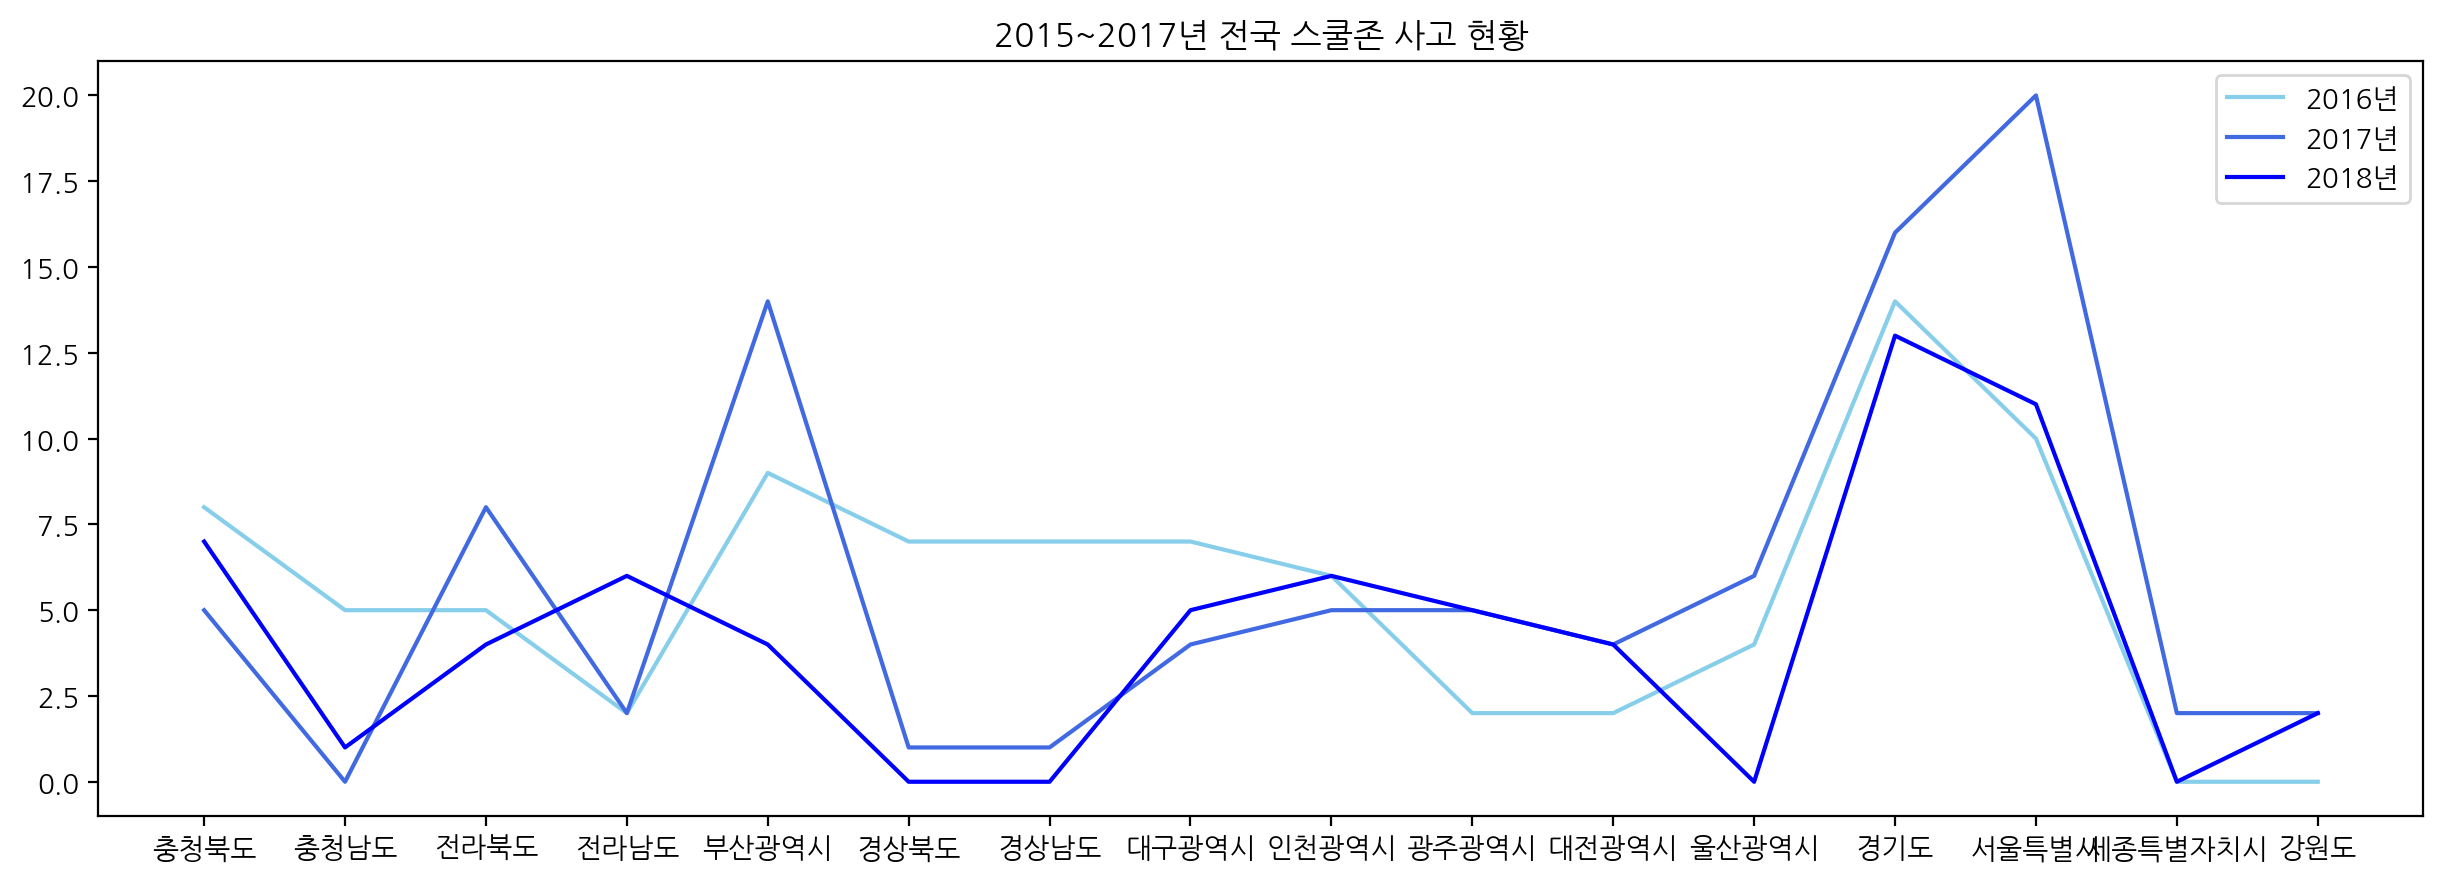

In [67]:
plt.figure(dpi=100, figsize= (15, 5))
plt.title('2015~2017년 전국 스쿨존 사고 현황')
plt.plot(region, acci_2016, color = 'skyblue', label='2016년')
plt.plot(region, acci_2017, color = 'royalblue', label='2017년')
plt.plot(region, acci_2018, color = 'blue', label='2018년')
plt.legend()
plt.show()